In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# comments=pd.read_csv(r'C:\Users\' Admin\Desktop\projects\python\1..Youtube\UScomments.csv',error_bad_lines=False)
comments=pd.read_csv(r'C:\Users\' Admin\Desktop\mca\sem2project\UScomments.csv',error_bad_lines=False)

C:\Users\' Admin\AppData\Local\Temp\ipykernel_8208\1350837491.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments=pd.read_csv(r'C:\Users\' Admin\Desktop\mca\sem2project\UScomments.csv',error_bad_lines=False)
Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

C:\Users\' Admin\AppData\Local\Temp\ipykernel_8208\1350837491.py:2: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments=pd.read_csv(r'C:\Users\' Admin\Desktop\mca\sem2project\UScomments.csv',error_bad_lines=False)


In [8]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [9]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [10]:
comments.dropna(inplace=True)

In [11]:
!pip install textblob 

In [12]:
from textblob import TextBlob

In [13]:
TextBlob('trending 😉').sentiment.polarity

0.0

In [14]:
polarity=[]
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [15]:
polarity[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573]

In [16]:
comments['polarity']=polarity

comments.head(14)

In [18]:
comments_positive=comments[comments['polarity']==1]

In [19]:
comments_positive.head(2)

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   

    replies  polarity  
64        0       1.0  
156       0       1.0

In [20]:
comments_negative=comments[comments['polarity']==-1]

In [21]:
comments_negative.head(2)

video_id                                       comment_text likes  \
512  8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562  8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   

    replies  polarity  
512       0      -1.0  
562       0      -1.0

In [22]:
!pip install wordcloud


In [23]:
from wordcloud import WordCloud , STOPWORDS

In [24]:
comments_negative['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [25]:
total_comments=''.join(comments_negative['comment_text'])

In [26]:
total_comments[0:100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!!W"

(-0.5, 399.5, 199.5, -0.5)

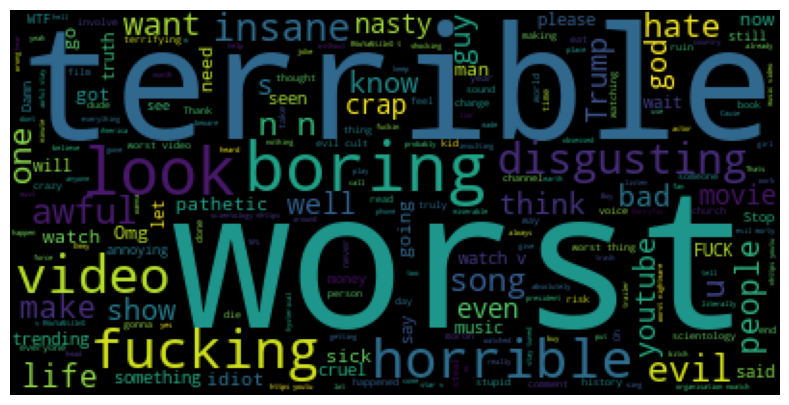

In [27]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [28]:
total_comments2=''.join(comments_positive['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

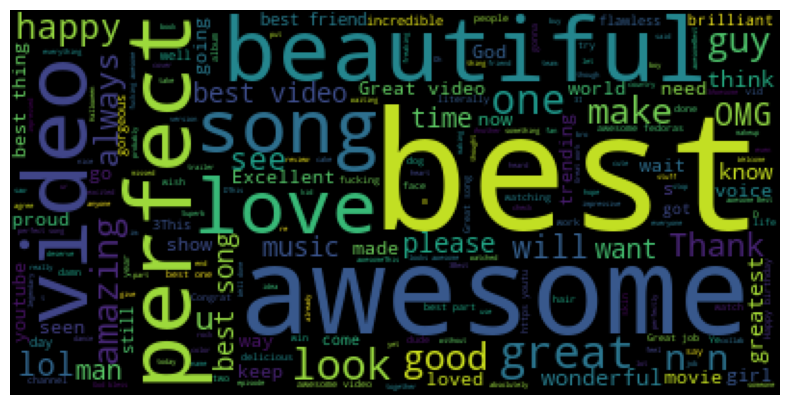

In [29]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments2)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [30]:
!pip install emojis

In [31]:
import emojis as emj

In [32]:
comments_emoji=emj.get('The end though 😭👍🏻❤️')
list(comments_emoji)


['❤️', '👍', '😭']

In [33]:
# # comm_main=comments.iloc[:,1:2]
# result_comm=[]
# for comment in comments['comment_text']:
#     comments_emoji=emj.get(comment)
#     result_comm.extend(list(comments_emoji))
# #     print(comment)

# print(result_comm)

In [34]:
# comm_main=comments.iloc[:,1:2]
dummy_comments = ['The end though 😭👍🏻❤️','The end though ❤️','The end though 😭👍🏻']
result_comm=[]
for comment in dummy_comments:
    comments_emoji=emj.get(comment)
    result_comm.extend(list(comments_emoji))
#     print(comment)

print(result_comm)

['❤️', '👍', '😭', '❤️', '👍', '😭']


In [35]:
result_comm=[]
for i in range(1,30000):
    comments_emoji=emj.get(comments['comment_text'][i])
    result_comm.extend(list(comments_emoji))
    
# print(comments['comment_text'][i]) 
# for comment in comments['comment_text']:
#     comments_emoji=emj.get(comment)
#     result_comm.extend(list(comments_emoji))
# #     print(comment)

print(result_comm[0:10])

['😉', '❤️', '👍', '😭', '💋', '👍', '💙', '😍', '👈', '😂']


In [36]:
from collections import Counter

In [37]:
Counter(result_comm).most_common(10)[0][0]

'😂'

In [38]:
Counter(result_comm).most_common(10)[0][1]

767

In [39]:
emojis_most=[Counter(result_comm).most_common(10)[i][0] for i in range(10)]
print(emojis_most)

['😂', '😍', '❤️', '😭', '😊', '👍', '💕', '🔥', '👌', '😘']


In [40]:
emojis_freq=[Counter(result_comm).most_common(10)[i][1] for i in range(10)]
print(emojis_freq)

[767, 527, 318, 135, 128, 108, 107, 105, 102, 101]


In [41]:
!pip install plotly

In [42]:
import plotly.graph_objs as go

In [43]:
from plotly.offline import iplot

In [44]:
trace=go.Bar(x=emojis_most,y=emojis_freq)

In [45]:
iplot([trace])

In [46]:
import os

In [47]:
path=r'C:\Users\' Admin\Downloads\1..Youtube\additional_data'

In [48]:
files=os.listdir(path)
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [49]:
for i in range(1,len(files),2):
    print(i)

1
3
5
7
9
11
13
15
17
19


In [50]:
files_csv=[files[i] for i in range(0,len(files),2)]
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [51]:
full_df=pd.DataFrame()
for file in files_csv:
    current_df=pd.read_csv(path+'/'+file,encoding='iso-8859-1',error_bad_lines=False)
    current_df['country']=file.split('.')[0][0:2]
    full_df=pd.concat([full_df,current_df])

C:\Users\' Admin\AppData\Local\Temp\ipykernel_8208\393249080.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\' Admin\AppData\Local\Temp\ipykernel_8208\393249080.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\' Admin\AppData\Local\Temp\ipykernel_8208\393249080.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\' Admin\AppData\Local\Temp\ipykernel_8208\393249080.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\' Admin\AppData\Local\Temp\ipykernel_8208\393249080.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future vers

In [52]:
full_df.head(5)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description country  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA  
1  STill got a lot of packages. Probably will las...      CA  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA  
3  I know it's been a while since we did this sho...      CA  
4  ð§: https://ad.gt/yt-perfect\nð°: https://...      CA

In [53]:
full_df.shape

(375942, 17)

In [54]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [55]:
cat=pd.read_csv(r'C:\Users\' Admin\Downloads\1..Youtube/category_file.txt',sep=":",engine='python')

In [56]:
cat

Category_id      Category_name
1            \t\tFilm & Animation
2            \t\tAutos & Vehicles
10                      \t\tMusic
15             \t\tPets & Animals
17                     \t\tSports
18               \t\tShort Movies
19            \t\tTravel & Events
20                     \t\tGaming
21              \t\tVideoblogging
22             \t\tPeople & Blogs
23                     \t\tComedy
24              \t\tEntertainment
25            \t\tNews & Politics
26              \t\tHowto & Style
27                  \t\tEducation
28       \t\tScience & Technology
29      \t\tNonprofits & Activism
30                     \t\tMovies
31            \t\tAnime/Animation
32           \t\tAction/Adventure
33                   \t\tClassics
34                     \t\tComedy
35                \t\tDocumentary
36                      \t\tDrama
37                     \t\tFamily
38                    \t\tForeign
39                     \t\tHorror
40             \t\tSci-Fi/Fantasy
41                   \t\tThriller
42                     \t\tShorts
43                      \t\tShows
44       \t\tTrailers

In [57]:
cat.reset_index(inplace=True)

In [58]:
cat.columns=['category_id','Category_name']

In [59]:
cat

category_id               Category_name
0             1        \t\tFilm & Animation
1             2        \t\tAutos & Vehicles
2            10                   \t\tMusic
3            15          \t\tPets & Animals
4            17                  \t\tSports
5            18            \t\tShort Movies
6            19         \t\tTravel & Events
7            20                  \t\tGaming
8            21           \t\tVideoblogging
9            22          \t\tPeople & Blogs
10           23                  \t\tComedy
11           24           \t\tEntertainment
12           25         \t\tNews & Politics
13           26           \t\tHowto & Style
14           27               \t\tEducation
15           28    \t\tScience & Technology
16           29   \t\tNonprofits & Activism
17           30                  \t\tMovies
18           31         \t\tAnime/Animation
19           32        \t\tAction/Adventure
20           33                \t\tClassics
21           34                  \t\tComedy
22           35             \t\tDocumentary
23           36                   \t\tDrama
24           37                  \t\tFamily
25           38                 \t\tForeign
26           39                  \t\tHorror
27           40          \t\tSci-Fi/Fantasy
28           41                \t\tThriller
29           42                  \t\tShorts
30           43                   \t\tShows
31           44    \t\tTrailers

In [60]:
cat.set_index('category_id',inplace=True)

In [61]:
cat

Category_name
category_id                            
1                  \t\tFilm & Animation
2                  \t\tAutos & Vehicles
10                            \t\tMusic
15                   \t\tPets & Animals
17                           \t\tSports
18                     \t\tShort Movies
19                  \t\tTravel & Events
20                           \t\tGaming
21                    \t\tVideoblogging
22                   \t\tPeople & Blogs
23                           \t\tComedy
24                    \t\tEntertainment
25                  \t\tNews & Politics
26                    \t\tHowto & Style
27                        \t\tEducation
28             \t\tScience & Technology
29            \t\tNonprofits & Activism
30                           \t\tMovies
31                  \t\tAnime/Animation
32                 \t\tAction/Adventure
33                         \t\tClassics
34                           \t\tComedy
35                      \t\tDocumentary
36                            \t\tDrama
37                           \t\tFamily
38                          \t\tForeign
39                           \t\tHorror
40                   \t\tSci-Fi/Fantasy
41                         \t\tThriller
42                           \t\tShorts
43                            \t\tShows
44             \t\tTrailers

In [62]:
dct=cat.to_dict()

In [63]:
dct

{'Category_name': {1: ' \t\tFilm & Animation',
  2: ' \t\tAutos & Vehicles',
  10: ' \t\tMusic',
  15: ' \t\tPets & Animals',
  17: ' \t\tSports',
  18: ' \t\tShort Movies',
  19: ' \t\tTravel & Events',
  20: ' \t\tGaming',
  21: ' \t\tVideoblogging',
  22: ' \t\tPeople & Blogs',
  23: ' \t\tComedy',
  24: ' \t\tEntertainment',
  25: ' \t\tNews & Politics',
  26: ' \t\tHowto & Style',
  27: ' \t\tEducation',
  28: ' \t\tScience & Technology',
  29: ' \t\tNonprofits & Activism',
  30: ' \t\tMovies',
  31: ' \t\tAnime/Animation',
  32: ' \t\tAction/Adventure',
  33: ' \t\tClassics',
  34: ' \t\tComedy',
  35: ' \t\tDocumentary',
  36: ' \t\tDrama',
  37: ' \t\tFamily',
  38: ' \t\tForeign',
  39: ' \t\tHorror',
  40: ' \t\tSci-Fi/Fantasy',
  41: ' \t\tThriller',
  42: ' \t\tShorts',
  43: ' \t\tShows',
  44: ' \t\tTrailers            '}}

In [64]:
full_df['Category_name']=full_df['category_id'].map(dct['Category_name'])

In [65]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'Category_name'],
      dtype='object')

In [66]:
full_df.head(3)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   

                                         description country Category_name  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA     \t\tMusic  
1  STill got a lot of packages. Probably will las...      CA    \t\tComedy  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA    \t\tComedy

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' \t\tMusic'),
  Text(1, 0, ' \t\tComedy'),
  Text(2, 0, ' \t\tEntertainment'),
  Text(3, 0, ' \t\tNews & Politics'),
  Text(4, 0, ' \t\tPeople & Blogs'),
  Text(5, 0, ' \t\tHowto & Style'),
  Text(6, 0, ' \t\tFilm & Animation'),
  Text(7, 0, ' \t\tScience & Technology'),
  Text(8, 0, ' \t\tGaming'),
  Text(9, 0, ' \t\tSports'),
  Text(10, 0, ' \t\tNonprofits & Activism'),
  Text(11, 0, ' \t\tPets & Animals'),
  Text(12, 0, ' \t\tTravel & Events'),
  Text(13, 0, ' \t\tAutos & Vehicles'),
  Text(14, 0, ' \t\tEducation'),
  Text(15, 0, ' \t\tShows'),
  Text(16, 0, ' \t\tMovies'),
  Text(17, 0, ' \t\tTrailers            ')])

C:\anaconda\lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 9 (	) missing from current font.

C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 9 (	) missing from current font.



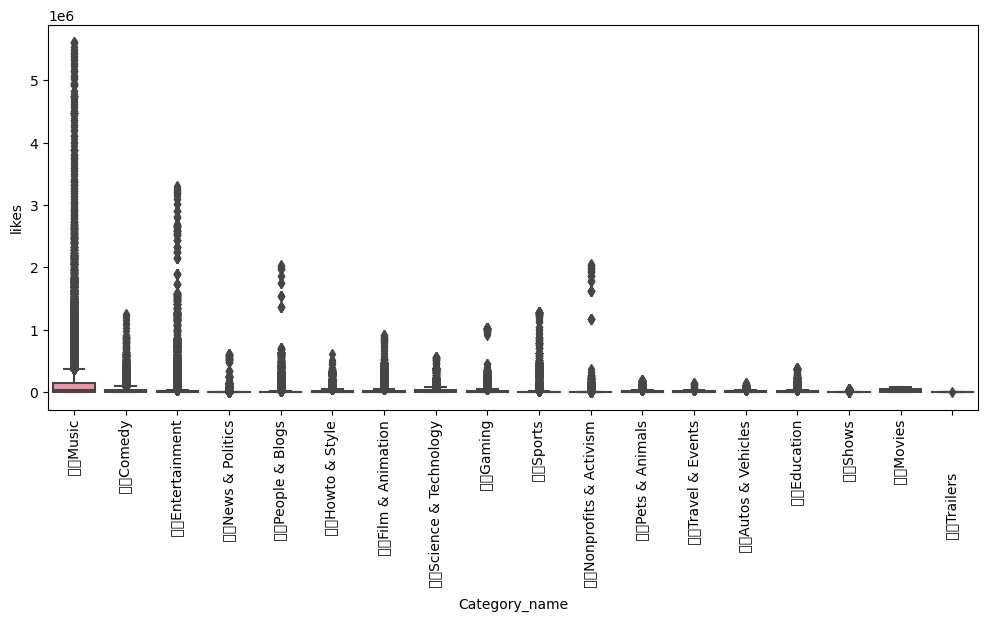

In [67]:
plt.figure(figsize=(12,5))
sns.boxplot(data=full_df,x='Category_name',y='likes')
plt.xticks(rotation='vertical')


In [68]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'Category_name'],
      dtype='object')

In [69]:
full_df['likes_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislikes_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comments_count_rate']=(full_df['comment_count']/full_df['views'])*100

In [70]:
full_df.head(3)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   

   dislikes  ...                                  thumbnail_link  \
0     43420  ...  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688  ...  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339  ...  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1             False             False                   False   
2             False             False                   False   

                                         description country Category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA     \t\tMusic   
1  STill got a lot of packages. Probably will las...      CA    \t\tComedy   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA    \t\tComedy   

  likes_rate  dislikes_rate  comments_count_rate  
0   4.589104       0.253051             0.733639  
1  12.594873       0.166363             1.284185  
2   4.575843       0.167292             0.256342  

[3 rows x 21 columns]

<Axes: xlabel='views', ylabel='likes'>

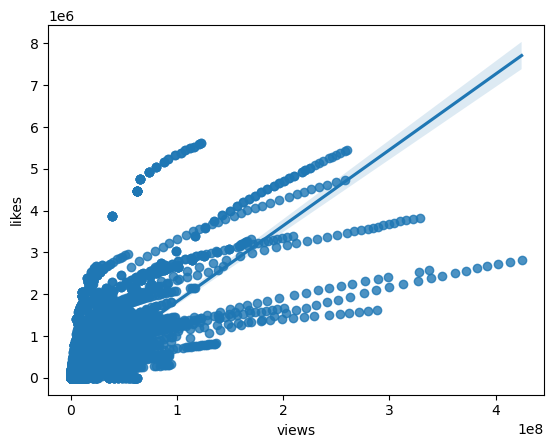

In [72]:
sns.regplot(data=full_df,x='views',y='likes')

<Axes: >

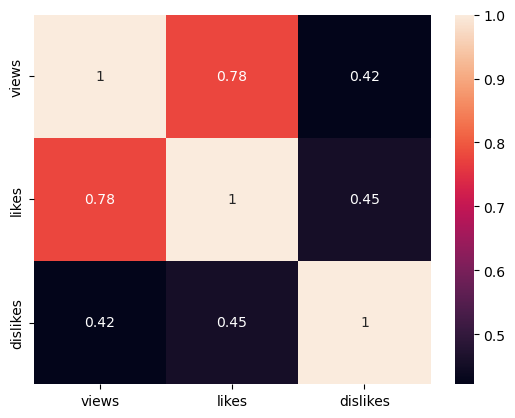

In [73]:
sns.heatmap(full_df[['views','likes','dislikes']].corr(),annot=True)